In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("multi-variate(basic).csv")
data

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [4]:
#using median strategy to fill the NaN values
data[['experience', 'test_score']] = data[['experience', 'test_score']].fillna(data[['experience', 'test_score']].median())


In [5]:
data

,experience,test_score,interview_score,salary
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       8 non-null      float64
 1   test_score       8 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 384.0 bytes


In [7]:
data.describe()

,experience,test_score,interview_score,salary
count,8.000000,8.000000,8.000000,8.00000
mean,6.250000,7.875000,7.875000,63000.00000
std,3.105295,1.246423,1.642081,11501.55269
min,2.000000,6.000000,6.000000,45000.00000
25%,4.500000,7.000000,6.750000,57500.00000
50%,6.000000,8.000000,7.500000,63500.00000
75%,7.750000,8.250000,9.250000,70500.00000
max,11.000000,10.000000,10.000000,80000.00000


In [8]:
X = data.iloc[:,0:3].values
#independent variables

In [9]:
Y = data.salary.values
#dependent variable

In [10]:
# building multivariate regression model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=355)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
mlr = LinearRegression()
mlr.fit(x_train,y_train)


LinearRegression()

In [15]:
#predicting for random values
y_predict = mlr.predict([[14,9,10],[3,8,9],[5,7,6]])
y_predict

array([91635.45900491, 62454.94043448, 60279.32725999])

Text(0, 0.5, 'y_pred')

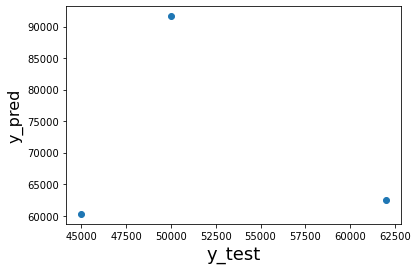

In [16]:
#plotting the test data versus the predicted data
plt.scatter(y_test,y_predict)
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16)


In [17]:
#performance evaluation metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('R squared: {:.2f}'.format(mlr.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 16.74
Mean Absolute Error: 19123.242233123103
Mean Square Error: 655725419.6219435
Root Mean Square Error: 25607.13610738115


In [50]:
#score of the model
print(mlr.score(x_test, y_test))

0.8580103711790391
